In [1]:
import pandas as pd

ds = pd.read_csv("../../data/cyber/twitter_cs.csv", header = None)

In [2]:
import sys
sys.path.append("../../../Common/utils")
from domain_tools import get_2ld

In [4]:
ds.columns = ["fqdn"]
ds["apex"] = ds["fqdn"].apply(get_2ld)

In [6]:
ds_apex = ds.groupby("apex").size().reset_index(name = "#fqdns").sort_values(by = "#fqdns", ascending = False)
ds_apex.head(25)

,apex,#fqdns
52257,wordpress.com,1450
5958,blogspot.com,1053
27778,ln.is,246
21814,i4i.me,203
48539,tumblr.com,162
43377,stfi.re,132
18875,github.io,96
5956,blogspot.co.uk,80
48123,trendolizer.com,79
48755,twitter.com,68


In [8]:
ds[ds["fqdn"].str.endswith(".edu")]

,fqdn,apex
240,www-personal.umich.edu,umich.edu
273,news.upenn.edu,upenn.edu
384,rasmussen.edu,rasmussen.edu
511,news.berkeley.edu,berkeley.edu
696,research.umd.edu,umd.edu
...,...,...
63933,magazine.marquette.edu,marquette.edu
64216,libres.uncg.edu,uncg.edu
64270,t.uga.edu,uga.edu
64311,alumni.kentlaw.iit.edu,iit.edu


In [9]:
ds[ds["fqdn"].str.endswith(".gov")]

,fqdn,apex
109,oag.dc.gov,dc.gov
134,loc.gov,loc.gov
238,cdn.ca9.uscourts.gov,uscourts.gov
342,feinstein.senate.gov,senate.gov
455,on.pa.gov,pa.gov
...,...,...
64112,duckworth.senate.gov,senate.gov
64171,media.ca8.uscourts.gov,uscourts.gov
64318,secure.ssa.gov,ssa.gov
64614,dcf.ks.gov,ks.gov


In [16]:
import glob
import gzip
import re
def get_alexa_dict():
    alexa_dict = dict()
    for filename in glob.glob("/export/sec04/alexa/Alexa_topk_each_day/*2017*"):
        f = open(filename, 'r')
        for line in f:
            arr = re.split("\t", line)
            if len(arr) != 2:
                print("error")
                continue
            rank = int(arr[0].strip())
            domain = arr[1].strip()
            if domain not in alexa_dict:
                alexa_dict[domain] = {"avg": 0.0, "max": 0, "min": 10000000, "days": 0}
            alexa_dict[domain]["avg"] = (alexa_dict[domain]["avg"] + rank)/2
            if alexa_dict[domain]["max"] < rank:
                alexa_dict[domain]["max"] = rank
            if alexa_dict[domain]["min"] > rank:
                alexa_dict[domain]["min"] = rank
            alexa_dict[domain]["days"] += 1
    return alexa_dict

In [17]:
alexa_dict = get_alexa_dict()

In [18]:
#write the ranks
f = open("../../data/cyber/alexa_ranking_2017.csv", "w")
for key, value in alexa_dict.items():
    f.write("{},{},{},{},{}\n".format(key, value["avg"], value["min"], value["max"], value["days"]))
f.close()

In [19]:
alexa = pd.read_csv("../../data/cyber/alexa_ranking_2017.csv", header = None)
alexa.columns = ["domain", "avg", "min", "max", "days"]

In [20]:
def get_alexa_rank(apex, alexa_dict):
    if apex in alexa_dict:
        return alexa_dict[apex]["avg"]
    else:
        return 1000000

In [21]:
ds["alexa"] = ds["apex"].apply(lambda x: get_alexa_rank(x, alexa_dict))

In [27]:
ds[ds["alexa"] < 100000]

,fqdn,apex,alexa
0,m.nbc12.com,nbc12.com,63745.961046
3,mlbtraderumors.com,mlbtraderumors.com,9790.082928
5,csp-evaluator.withgoogle.com,withgoogle.com,1655.014604
7,searchunifiedcommunications.techtarget.com,techtarget.com,1661.079143
8,secure.avaaz.org,avaaz.org,8538.030347
...,...,...,...
64777,pmnewsnigeria.com,pmnewsnigeria.com,44674.447678
64778,asp.net,asp.net,4618.008828
64783,ktrh.iheart.com,iheart.com,2448.225246
64785,kaspersky.es,kaspersky.es,95085.541283


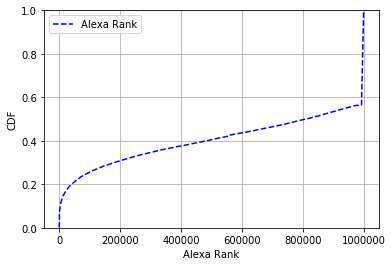

In [25]:
sys.path.append("../../../Common/utils")
from chart_tools import plot_numeric_cdf

data = [[ds, "alexa", None, None, "Alexa Rank", "--", "blue"]]
plot_numeric_cdf(data, "Alexa Rank")

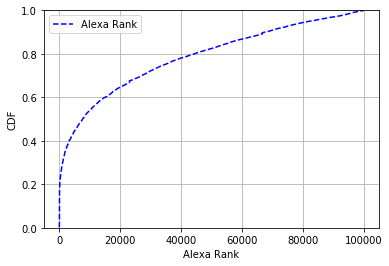

In [26]:
data = [[ds, "alexa", None, 100000, "Alexa Rank", "--", "blue"]]
plot_numeric_cdf(data, "Alexa Rank")

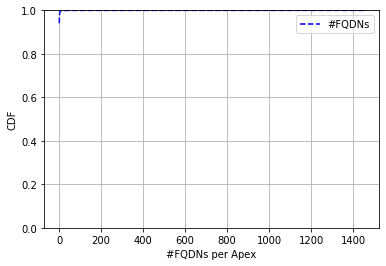

In [32]:
data = [[ds_apex, "#fqdns", None, None, "#FQDNs", "--", "blue"]]
plot_numeric_cdf(data, "#FQDNs per Apex")

In [39]:
ds_apex[ds_apex["#fqdns"] == 1].shape

(50575, 2)